In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_courses = pd.read_csv('udemy_courses.csv')

In [3]:
df_courses_copy = pd.read_csv('udemy_courses.csv')

In [4]:
# import re

# re_pattern = '([a-zA-Z]+)'
# titles = df_courses_copy['course_title']
# non_latin_title_ix = np.argwhere(np.array(list(map(lambda x: re.search(re_pattern, x), titles))) == None).reshape(-1).tolist()
# df_courses_copy.drop(non_latin_title_ix, axis=0, inplace=True)

In [5]:
df_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
import re

# remove courses whose titles are written in non latin
re_pattern = '([a-zA-Z]+)'
titles = df_courses['course_title'].tolist()
non_english_ix = np.argwhere(
    np.array(list(map(lambda x: re.search(re_pattern, x), titles))) == None
).reshape(-1).tolist()
df_courses.drop(index=non_english_ix, axis=0, inplace=True)

In [7]:
df_course_titles = df_courses[df_courses['subject'].isin(
    ['Business Finance', 'Graphic Design', 'Musical Instruments', 'Web Development']
)][['course_title', 'subject']]

In [8]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# convert to lower case
df_course_titles['course_title_clean'] = df_course_titles['course_title'].copy().apply(lambda x: x.lower())

# remove digits
df_course_titles['course_title_clean'] = df_course_titles['course_title_clean'].copy().apply(lambda x: remove_numbers(x))

In [9]:
df_course_titles[df_course_titles['course_title'].str.contains("'")]

,course_title,subject,course_title_clean
10,Forex Trading Secrets of the Pros With Amazon'...,Business Finance,forex trading secrets of the pros with amazon'...
58,A Beginner's Guide to Quantopian Futures API,Business Finance,a beginner's guide to quantopian futures api
84,"Using 'The Greeks To Understand Options""",Business Finance,"using 'the greeks to understand options"""
136,Forex Trading with Fixed 'Risk through Options...,Business Finance,forex trading with fixed 'risk through options...
165,How to remove 'Risk from Penny Stocks - Option...,Business Finance,how to remove 'risk from penny stocks - option...
...,...,...,...
3250,ES6 Javascript: The Complete Developer's Guide,Web Development,es javascript: the complete developer's guide
3338,How to Build WordPress Themes: A Web Designer'...,Web Development,how to build wordpress themes: a web designer'...
3477,A Beginner's Guide to the Meteor JavaScript Fr...,Web Development,a beginner's guide to the meteor javascript fr...
3534,Introduction to Voice Design with Amazon's Alexa,Web Development,introduction to voice design with amazon's alexa


In [10]:
from string import punctuation

# remove punctuation
def remove_punctuation(text):
    return ''.join(c for c in text if c not in punctuation)

df_course_titles['course_title_clean'] = df_course_titles['course_title_clean'].copy().apply(remove_punctuation)

In [11]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
df_course_titles

,course_title,subject,course_title_clean
0,Ultimate Investment Banking Course,Business Finance,ultimate investment banking course
1,Complete GST Course & Certification - Grow You...,Business Finance,complete gst course certification grow your ...
2,Financial Modeling for Business Analysts and C...,Business Finance,financial modeling for business analysts and c...
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance,beginner to pro financial analysis in excel
4,How To Maximize Your Profits Trading Options,Business Finance,how to maximize your profits trading options
...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Web Development,learn jquery from scratch master of javascrip...
3674,How To Design A WordPress Website With No Codi...,Web Development,how to design a wordpress website with no codi...
3675,Learn and Build using Polymer,Web Development,learn and build using polymer
3676,CSS Animations: Create Amazing Effects on Your...,Web Development,css animations create amazing effects on your ...


In [13]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/idrishaidar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/idrishaidar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# remove stopwords
def remove_stopwords(text):
    eng_stopwords = stopwords.words('english')
    return ' '.join([word for word in nltk.word_tokenize(text) if word not in eng_stopwords])

df_course_titles['course_title_clean'] = df_course_titles['course_title_clean'].copy().apply(remove_stopwords)

In [16]:
df_course_titles['course_title_clean'].tolist()

['ultimate investment banking course',
 'complete gst course certification grow ca practice',
 'financial modeling business analysts consultants',
 'beginner pro financial analysis excel',
 'maximize profits trading options',
 'trading penny stocks guide levels',
 'investing trading beginners mastering price charts',
 'trading stock chart patterns immediate explosive gains',
 'options trading advanced stock profit success method',
 'investment strategy need retirement',
 'forex trading secrets pros amazons aws',
 'trading options money flow',
 'financial management risk return securities',
 'forex trading course work smarter harder proven results',
 'python algo trading sentiment trading news',
 'short selling learn sell stocks fall',
 'basic technical analysis learn structure market',
 'complete chart pattern trading course proven approach',
 'deadly mistakes investing slash profits',
 'financial statements made easy',
 'winning forex trading live forex trading examples',
 'forex trad

In [17]:
from nltk.stem import SnowballStemmer

# stemming (transform to root word)
def stem_word(text):
    stemmed_words = [snowball_stemmer.stem(word) for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]
    return ' '.join(stemmed_words)
    
snowball_stemmer = SnowballStemmer('english')
df_course_titles['course_title_clean_stem'] = df_course_titles.loc[:, 'course_title_clean'].apply(stem_word)

In [18]:
df_course_titles

,course_title,subject,course_title_clean,course_title_clean_stem
0,Ultimate Investment Banking Course,Business Finance,ultimate investment banking course,ultim invest bank cours
1,Complete GST Course & Certification - Grow You...,Business Finance,complete gst course certification grow ca prac...,complet gst cours certif grow ca practic
2,Financial Modeling for Business Analysts and C...,Business Finance,financial modeling business analysts consultants,financi model busi analyst consult
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance,beginner pro financial analysis excel,beginn pro financi analysi excel
4,How To Maximize Your Profits Trading Options,Business Finance,maximize profits trading options,maxim profit trade option
...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Web Development,learn jquery scratch master javascript library,learn jqueri scratch master javascript librari
3674,How To Design A WordPress Website With No Codi...,Web Development,design wordpress website coding,design wordpress websit code
3675,Learn and Build using Polymer,Web Development,learn build using polymer,learn build use polym
3676,CSS Animations: Create Amazing Effects on Your...,Web Development,css animations create amazing effects website,css anim creat amaz effect websit


In [19]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/idrishaidar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
def lemmatize_word(text):
    lemmatized_words = [
        wordnet_lemmatizer.lemmatize(word) 
        for sentence in nltk.sent_tokenize(text) 
        for word in nltk.word_tokenize(sentence)
    ]
    
    return ' '.join(lemmatized_words)

wordnet_lemmatizer = WordNetLemmatizer()
df_course_titles['course_title_clean_lemma'] = df_course_titles.loc[:, 'course_title_clean'].apply(lemmatize_word)

In [21]:
lemmatize_word("The striped bats are hanging on their feet for best")

'The striped bat are hanging on their foot for best'

In [22]:
df_course_titles

,course_title,subject,course_title_clean,course_title_clean_stem,course_title_clean_lemma
0,Ultimate Investment Banking Course,Business Finance,ultimate investment banking course,ultim invest bank cours,ultimate investment banking course
1,Complete GST Course & Certification - Grow You...,Business Finance,complete gst course certification grow ca prac...,complet gst cours certif grow ca practic,complete gst course certification grow ca prac...
2,Financial Modeling for Business Analysts and C...,Business Finance,financial modeling business analysts consultants,financi model busi analyst consult,financial modeling business analyst consultant
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance,beginner pro financial analysis excel,beginn pro financi analysi excel,beginner pro financial analysis excel
4,How To Maximize Your Profits Trading Options,Business Finance,maximize profits trading options,maxim profit trade option,maximize profit trading option
...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Web Development,learn jquery scratch master javascript library,learn jqueri scratch master javascript librari,learn jquery scratch master javascript library
3674,How To Design A WordPress Website With No Codi...,Web Development,design wordpress website coding,design wordpress websit code,design wordpress website coding
3675,Learn and Build using Polymer,Web Development,learn build using polymer,learn build use polym,learn build using polymer
3676,CSS Animations: Create Amazing Effects on Your...,Web Development,css animations create amazing effects website,css anim creat amaz effect websit,cs animation create amazing effect website


In [23]:
from nltk.corpus import wordnet

In [24]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/idrishaidar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_word_pos(text):
    lemmatized_words = [
        wordnet_lemmatizer.lemmatize(word, get_pos(word)) 
        for sentence in nltk.sent_tokenize(text) 
        for word in nltk.word_tokenize(sentence)
    ]
    
    return ' '.join(lemmatized_words)

df_course_titles['course_title_clean_lemma_pos'] = df_course_titles.loc[:, 'course_title_clean'].apply(lemmatize_word_pos)

In [26]:
df_course_titles

,course_title,subject,course_title_clean,course_title_clean_stem,course_title_clean_lemma,course_title_clean_lemma_pos
0,Ultimate Investment Banking Course,Business Finance,ultimate investment banking course,ultim invest bank cours,ultimate investment banking course,ultimate investment banking course
1,Complete GST Course & Certification - Grow You...,Business Finance,complete gst course certification grow ca prac...,complet gst cours certif grow ca practic,complete gst course certification grow ca prac...,complete gst course certification grow ca prac...
2,Financial Modeling for Business Analysts and C...,Business Finance,financial modeling business analysts consultants,financi model busi analyst consult,financial modeling business analyst consultant,financial model business analyst consultant
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance,beginner pro financial analysis excel,beginn pro financi analysi excel,beginner pro financial analysis excel,beginner pro financial analysis excel
4,How To Maximize Your Profits Trading Options,Business Finance,maximize profits trading options,maxim profit trade option,maximize profit trading option,maximize profit trading option
...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Web Development,learn jquery scratch master javascript library,learn jqueri scratch master javascript librari,learn jquery scratch master javascript library,learn jquery scratch master javascript library
3674,How To Design A WordPress Website With No Codi...,Web Development,design wordpress website coding,design wordpress websit code,design wordpress website coding,design wordpress website cod
3675,Learn and Build using Polymer,Web Development,learn build using polymer,learn build use polym,learn build using polymer,learn build use polymer
3676,CSS Animations: Create Amazing Effects on Your...,Web Development,css animations create amazing effects website,css anim creat amaz effect websit,cs animation create amazing effect website,cs animation create amaze effect website


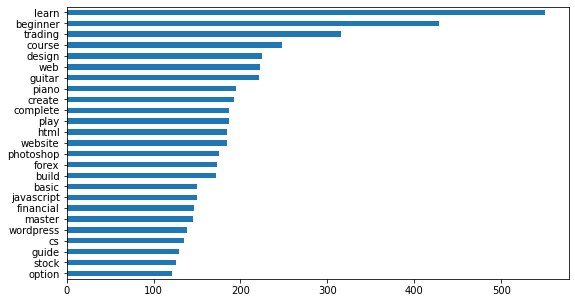

In [27]:
fig, ax = plt.subplots(figsize=(9,5))

titles = df_course_titles['course_title_clean_lemma_pos']
word_extract = titles.str.extractall('([a-zA_Z]+)').rename(columns={0: 'word'}).reset_index(drop=True)
word_extract['word'].value_counts().sort_values(ascending=True)[-25:].plot(kind='barh', ax=ax);

In [28]:
df_course_titles['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

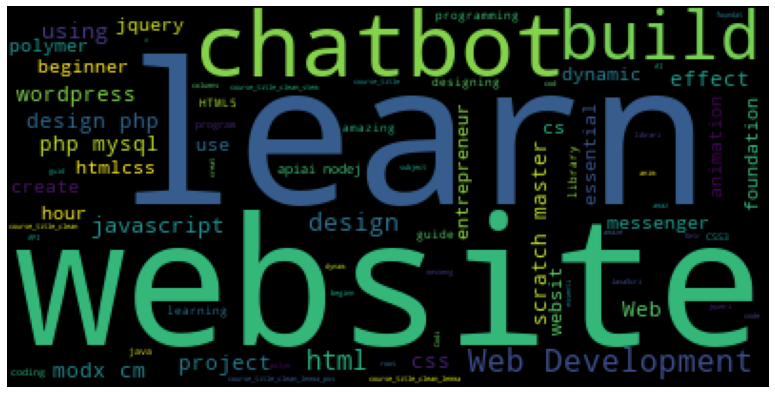

In [29]:
from wordcloud import WordCloud

subject_title = df_course_titles[df_course_titles['subject'] == 'Web Development']
title_wordcloud = WordCloud().generate(str(subject_title))
plt.figure(figsize=(15,7))
plt.imshow(title_wordcloud)
plt.axis('off');

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# term frequency
vectorizer = CountVectorizer()
vectorizer.fit(df_course_titles['course_title_clean_lemma_pos'])

CountVectorizer()

In [31]:
len(vectorizer.vocabulary_)

3152

In [32]:
vectorizer.vocabulary_

{'ultimate': 2870,
 'investment': 1484,
 'banking': 226,
 'course': 609,
 'complete': 533,
 'gst': 1254,
 'certification': 432,
 'grow': 1247,
 'ca': 378,
 'practice': 2118,
 'financial': 1060,
 'model': 1810,
 'business': 369,
 'analyst': 98,
 'consultant': 570,
 'beginner': 261,
 'pro': 2155,
 'analysis': 97,
 'excel': 972,
 'maximize': 1742,
 'profit': 2176,
 'trading': 2798,
 'option': 1949,
 'penny': 2016,
 'stock': 2625,
 'guide': 1259,
 'level': 1623,
 'invest': 1478,
 'master': 1727,
 'price': 2142,
 'chart': 444,
 'pattern': 2004,
 'immediate': 1382,
 'explosive': 994,
 'gain': 1170,
 'advanced': 51,
 'success': 2658,
 'method': 1776,
 'strategy': 2634,
 'need': 1865,
 'retirement': 2333,
 'forex': 1109,
 'secret': 2453,
 'amazon': 93,
 'aws': 200,
 'money': 1819,
 'flow': 1096,
 'management': 1697,
 'risk': 2353,
 'return': 2337,
 'security': 2457,
 'work': 3047,
 'smarter': 2557,
 'harder': 1288,
 'proven': 2198,
 'result': 2329,
 'python': 2228,
 'algo': 74,
 'sentiment': 2

<AxesSubplot:xlabel='subject', ylabel='num_lectures'>

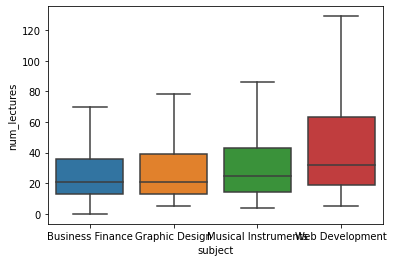

In [33]:
sns.boxplot(x='subject', y='num_lectures', data=df_courses, showfliers=False)

In [34]:
df_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [52]:
from sklearn.model_selection import train_test_split

num_cols = np.array(df_courses[['price', 'num_reviews']])
title_col = np.array(df_course_titles['course_title_clean_lemma_pos']).reshape(-1,1)
# X = np.concatenate([title_col, num_cols], axis=1)
X = df_course_titles['course_title_clean_lemma_pos']
y = df_course_titles['subject']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.2, stratify=y)

In [53]:
# np.array(X)
np.concatenate([np.array(X).reshape(-1,1), np.array(df_courses[['price', 'num_reviews']])], axis=1)

array([['ultimate investment banking course', 200, 23],
       ['complete gst course certification grow ca practice', 75, 923],
       ['financial model business analyst consultant', 45, 74],
       ...,
       ['learn build use polymer', 40, 169],
       ['cs animation create amaze effect website', 50, 31],
       ['use modx cm build website beginner guide', 45, 36]], dtype=object)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z]+')
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
word_cols = list(map(lambda x: 'tfidf_' + x, vectorizer.get_feature_names()))
df_vec_train = pd.DataFrame(X_train_counts.toarray(), columns=word_cols)
df_vec_train['subject'] = y_train.reset_index(drop=True)
df_vec_train
# df_course_titles_with_vec = pd.concat([df_course_titles.reset_index(), df_count_vec], axis=1)

,tfidf_abc,tfidf_ability,tfidf_abrsm,tfidf_absolute,tfidf_absolutely,tfidf_academy,tfidf_acapulco,tfidf_acca,tfidf_accelerate,tfidf_acceleration,...,tfidf_zeichnen,tfidf_zend,tfidf_zero,tfidf_zerotohero,tfidf_zf,tfidf_zoho,tfidf_zombie,tfidf_zuhause,tfidf_zur,subject
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Musical Instruments
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graphic Design
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Finance
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graphic Design
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Development
2912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Finance
2913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Finance
2914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Finance


In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier


# clf = MultinomialNB()
clf = SGDClassifier()
clf.fit(X_train_counts, y_train)
clf.score(X_train_counts, y_train)

0.9993141289437586

In [57]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(X_train_counts)
print(classification_report(y_train, y_pred_train))

                     precision    recall  f1-score   support

   Business Finance       1.00      1.00      1.00       938
     Graphic Design       1.00      1.00      1.00       477
Musical Instruments       1.00      1.00      1.00       541
    Web Development       1.00      1.00      1.00       960

           accuracy                           1.00      2916
          macro avg       1.00      1.00      1.00      2916
       weighted avg       1.00      1.00      1.00      2916



In [58]:
from sklearn.model_selection import cross_val_score

cross_val_score(MultinomialNB(), X_train_counts, y_train, cv=5).mean()

0.9396484879813907

In [59]:
clf.score(X_test_counts, y_test)

0.9547325102880658

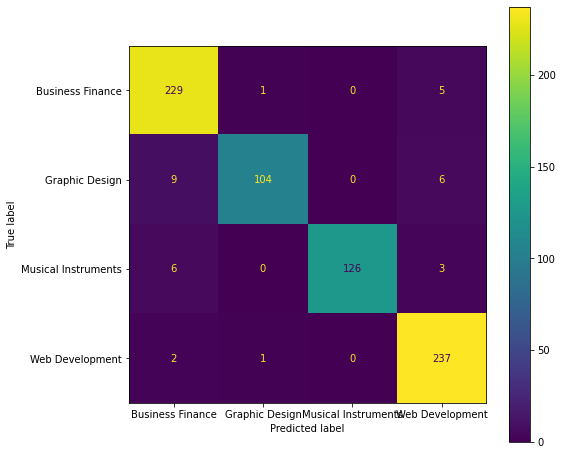

In [60]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(clf, X_test_counts, y_test, ax=ax);

In [61]:
y_pred_test =  clf.predict(X_test_counts)
all_cols = np.concatenate([np.array(X_test).reshape(-1,1), np.array(y_test).reshape(-1,1), y_pred_test.reshape(-1,1)], axis=1)
df_prediction = pd.DataFrame(all_cols, columns=['course_title', 'y_actual', 'y_pred'])
df_prediction['correct_prediction'] = df_prediction['y_actual'] == df_prediction['y_pred']
# df_prediction[df_prediction['correct_prediction'] == False].iloc[1]['course_title']

In [62]:
df_prediction[df_prediction['correct_prediction'] == False]

,course_title,y_actual,y_pred,correct_prediction
22,devenez le king de lillustration automobile,Graphic Design,Business Finance,False
36,introduction data analytics use microsoft powe...,Web Development,Business Finance,False
42,typography learn basic build solid foundation,Graphic Design,Web Development,False
67,become etsy wholesale seller,Graphic Design,Business Finance,False
100,infodesign,Graphic Design,Business Finance,False
141,plantillas powerpoint para publicar en mercado...,Graphic Design,Business Finance,False
148,chug dont mean thing aint get swing,Musical Instruments,Business Finance,False
158,見てわかる！やさしく独習アコギ（入門編）taka先生のアコースティックギターレッスンⅰ,Musical Instruments,Business Finance,False
172,create amaze youtube custom thumbnail image,Graphic Design,Web Development,False
185,concept statistic beginner step step,Business Finance,Web Development,False


In [63]:
num_cols = np.array(df_courses[['price', 'num_reviews']])
title_col = np.array(df_course_titles['course_title_clean_lemma_pos']).reshape(-1,1)
X = np.concatenate([title_col, num_cols], axis=1)
y = df_course_titles['subject']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.2, stratify=y)

In [64]:
df_X_train = pd.DataFrame(data=X_train, columns=['course_title_clean_lemma_pos', 'price', 'num_reviews'])
df_X_test = pd.DataFrame(data=X_test, columns=['course_title_clean_lemma_pos', 'price', 'num_reviews'])

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

stratified_cv = StratifiedKFold(n_splits=5, random_state=22, shuffle=True)

param_grid ={
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
#     'sgdclassifier__learning_rate': ['constant', 'optimal', 'adaptive'],
#     'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]
}

# 1. scaling --> price, num_reviews
# 2. tfidfvectorizer --> title
# 3. train model --> semua

scaled_cols = ['price', 'num_reviews']
vectorized_col = 'course_title_clean_lemma_pos'

# pipeline
model = SGDClassifier(early_stopping=True)
tfidf_vectorizer = TfidfVectorizer()
scaler = StandardScaler()

col_transformer = ColumnTransformer([
    ('scaler', scaler, scaled_cols),
    ('tfidfvectorizer', tfidf_vectorizer, vectorized_col),
])

pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('sgdclassifier', model)
])

# pipeline = Pipeline([
#     ('tfidfvectorizer', tfidf_vectorizer),
#     ('logisticregression', model)
# ])



gridsearch = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=stratified_cv
)

gridsearch.fit(df_X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['price',
                                                                          'num_reviews']),
                                                                        ('tfidfvectorizer',
                                                                         TfidfVectorizer(),
                                                                         'course_title_clean_lemma_pos')])),
                                       ('sgdclassifier',
                                        SGDClassifier(early_stopping=True))]),
             param_grid={'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
           